In [3]:
import pandas as pd 
import numpy as np
import networkx

In [ ]:
data = pd.read_excel(r'/Users/grzegorznaporowski/Desktop/Praca.xlsx')
data.head()

In [18]:
def test (col_1,col_2):
    if col_1 > col_2:
        return col_1 + col_2
    else:
        return col_2 + col_1

In [20]:
data.apply(lambda row:test(row['Scen I'],row['Scen II']),axis=1)

0    ITRX.120ITRX.119
1    ITRX.120ITRX.119
2    ITRX.192CSMC.202
3    ITRX.119ITRX.119
4    ITRX.192ITRX.120
dtype: object

In [21]:
data

,Scen I,Scen II,Ilość
0,ITRX.119,ITRX.120,5
1,ITRX.120,ITRX.119,8
2,ITRX.192,CSMC.202,15
3,ITRX.119,ITRX.119,5
4,ITRX.192,ITRX.120,3


In [15]:
data['test'] = data.apply(lambda row:test(data['Scen I'],data['Scen II']),axis=1)

TypeError: test() takes 1 positional argument but 2 were given

In [17]:
data[['X,Y']] = data[['Scen I','Scen II']].apply(test)
data

ValueError: too many values to unpack (expected 2)

In [170]:
data_groupped = pd.DataFrame(data.groupby('Sorted')['Ilość'].sum())
data_groupped.reset_index(inplace=True)
data_groupped

,Sorted,Ilość
0,"(CSMC.202, ITRX.192)",15
1,"(ITRX.119, ITRX.119)",5
2,"(ITRX.119, ITRX.120)",13
3,"(ITRX.120, ITRX.192)",3


In [171]:
for i in range(0,len(data_groupped)):
    split_lewo = data_groupped.loc[i]['Sorted'][0]
    split_prawo = data_groupped.loc[i]['Sorted'][1]
    if split_lewo == split_prawo:
        data_groupped.drop(i,inplace=True)



In [172]:
kol_1 = [x[0] for x in data_groupped['Sorted']]
kol_2 = [x[1] for x in data_groupped['Sorted']]

data_groupped['Scenariusz I'] = kol_1
data_groupped['Scenariusz II'] = kol_2

data_groupped.drop('Sorted',axis=1,inplace=True)

In [173]:
data_groupped

,Ilość,Scenariusz I,Scenariusz II
0,15,CSMC.202,ITRX.192
2,13,ITRX.119,ITRX.120
3,3,ITRX.120,ITRX.192


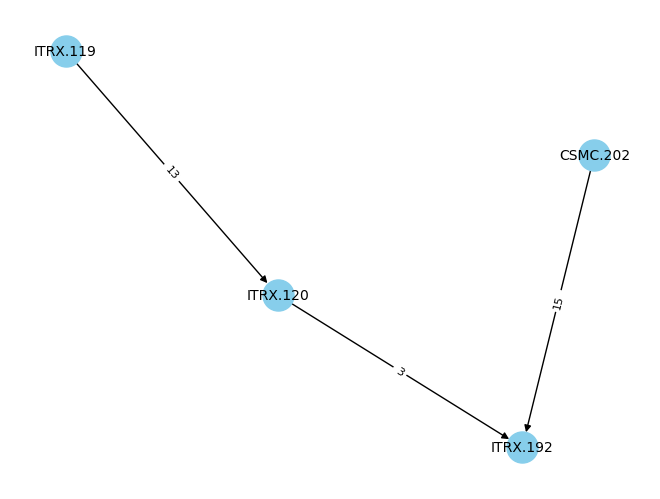

In [189]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.from_pandas_edgelist(data_groupped, 'Scenariusz I', 'Scenariusz II', edge_attr='Ilość', create_using=nx.DiGraph())

# Rysowanie grafu
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, arrowsize=10)

# Dodawanie etykiet do krawędzi (informacja o ilości)
edge_labels = {(u, v): d['Ilość'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()

In [1]:
data_groupped

NameError: name 'data_groupped' is not defined

In [185]:
data.drop('Sorted',axis=1)

,Scen I,Scen II,Ilość
0,ITRX.119,ITRX.120,5
1,ITRX.120,ITRX.119,8
2,ITRX.192,CSMC.202,15
3,ITRX.119,ITRX.119,5
4,ITRX.192,ITRX.120,3


In [186]:
data['Sorted'] = data.apply(lambda x:tuple(sorted([x['Scen I'],x['Scen II']])),axis=1)
data

,Scen I,Scen II,Ilość,Sorted
0,ITRX.119,ITRX.120,5,"(ITRX.119, ITRX.120)"
1,ITRX.120,ITRX.119,8,"(ITRX.119, ITRX.120)"
2,ITRX.192,CSMC.202,15,"(CSMC.202, ITRX.192)"
3,ITRX.119,ITRX.119,5,"(ITRX.119, ITRX.119)"
4,ITRX.192,ITRX.120,3,"(ITRX.120, ITRX.192)"


In [188]:
for i in range(len(data)):
    split_1 = data.loc[i]['Sorted'][0]
    split_2 = data.loc[i]['Sorted'][1]
    if split_1 == split_2:
        data.drop(i,inplace=True)

data

,Scen I,Scen II,Ilość,Sorted
0,ITRX.119,ITRX.120,5,"(ITRX.119, ITRX.120)"
1,ITRX.120,ITRX.119,8,"(ITRX.119, ITRX.120)"
2,ITRX.192,CSMC.202,15,"(CSMC.202, ITRX.192)"
4,ITRX.192,ITRX.120,3,"(ITRX.120, ITRX.192)"


In [190]:
for n,v in enumerate(data['Scen I']):
    print(n,v)

0 ITRX.119
1 ITRX.120
2 ITRX.192
3 ITRX.192
